### Universidad del Valle de Guatemala
#### Miguel Valle - 17102

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt('Admission_Predict.csv', delimiter=',')

#### Se elimina la fila del dataset que contiene los nombres de cada columna

In [2]:
data = np.delete(data, 0, 0)
print(data[0,:])

[  1.   337.   118.     4.     4.5    4.5    9.65   1.     0.92]


## Análisis de Variables

#### A continuación se presentan las gráficas para cada columna para verificar si existe alguna correlación con la probabilidad de ser admitido

#### Serial Number

####  <font color='red'>No se realizará la regresión lineal sobre esta variable dado que como se puede ver, no existe suficiente relación con la probabilidad de ser admitido</font>

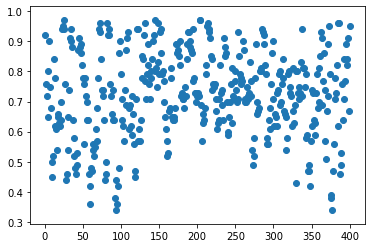

In [9]:
plt.scatter(data[:,0], data[:,8])
plt.show()

#### GRE Score

####  <font color='blue'>Si se realizará la regresión lineal sobre esta variable dado que como se puede ver en la grafica, la probabilidad de ser adimitdo aumenta con el valor del GRE Score</font>

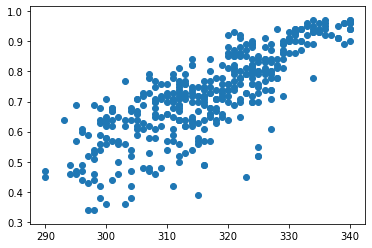

In [16]:
plt.scatter(data[:,1], data[:,8])
plt.show()

#### TOEFL Score

####  <font color='blue'>Si se realizará la regresión lineal sobre esta variable dado que como se puede ver en la grafica, la probabilidad de ser adimitdo aumenta con el valor del GRE Score</font>

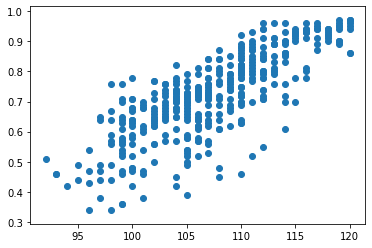

In [17]:
plt.scatter(data[:,2], data[:,8])
plt.show()

#### University Rating

####  <font color='red'>No se realizará la regresión lineal sobre esta variable dado que como se puede ver, no existe suficiente relación con la probabilidad de ser admitido</font>
Sin embargo si se podría utilizar en conjunto con alguna de las variables en azúl

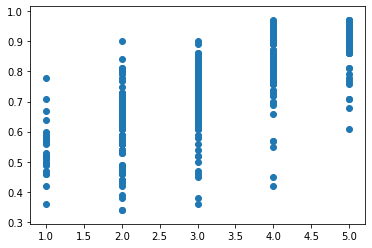

In [19]:
plt.scatter(data[:,3], data[:,8])
plt.show()

#### SOP

####  <font color='red'>No se realizará la regresión lineal sobre esta variable dado que como se puede ver, no existe suficiente relación con la probabilidad de ser admitido</font>
Sin embargo si se podría utilizar en conjunto con alguna de las variables en azúl

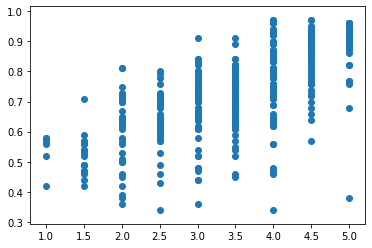

In [20]:
plt.scatter(data[:,4], data[:,8])
plt.show()

#### LOR

####  <font color='red'>No se realizará la regresión lineal sobre esta variable dado que como se puede ver, no existe suficiente relación con la probabilidad de ser admitido</font>
Sin embargo si se podría utilizar en conjunto con alguna de las variables en azúl

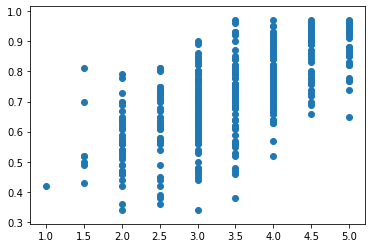

In [21]:
plt.scatter(data[:,5], data[:,8])
plt.show()

#### CGPA

####  <font color='blue'>Si se realizará la regresión lineal sobre esta variable dado que como se puede ver en la grafica, la probabilidad de ser adimitdo aumenta con el valor del CGPA</font>

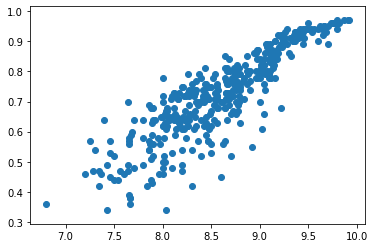

In [23]:
plt.scatter(data[:,6], data[:,8])
plt.show()

#### Research

####  <font color='red'>No se realizará la regresión lineal sobre esta variable dado que como se puede ver, no existe suficiente relación con la probabilidad de ser admitido</font>

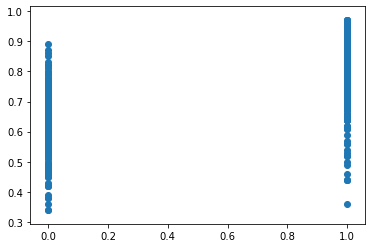

In [24]:
plt.scatter(data[:,7], data[:,8])
plt.show()

## GRE Score

### A continuación se encuentran histogramas de los dataset de training, cross validation y test, para asegurar que a la hora de tratar de realizar pruebas para verificar que la regresión ha acertado, no exista mucho sesgo y los datos estén relativamente normalizados.

Text(0.5, 1.0, 'Training Data "GRE Score"')

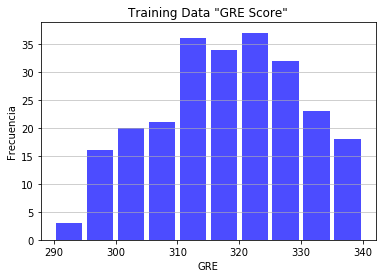

In [175]:
GRE = data[0:240,1]
y = data[0:240,8]
n, bins, patches = plt.hist(x = GRE, 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('GRE')
plt.ylabel('Frecuencia')
plt.title('Training Data "GRE Score"')

Text(0.5,1,'CV Data "GRE Score"')

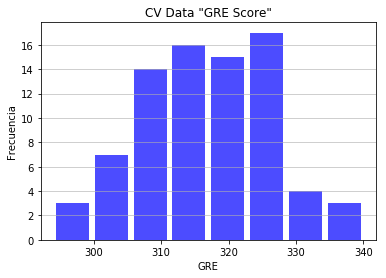

In [4]:
n, bins, patches = plt.hist(x = data[241:320,1], 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('GRE')
plt.ylabel('Frecuencia')
plt.title('CV Data "GRE Score"')

Text(0.5, 1.0, 'Test Data "GRE Score"')

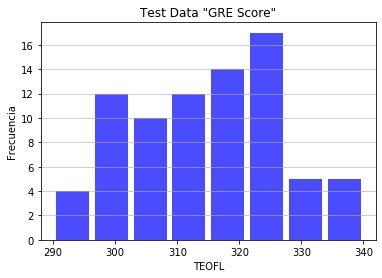

In [20]:
n, bins, patches = plt.hist(x = data[321:400,1], 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('GRE')
plt.ylabel('Frecuencia')
plt.title('Test Data "GRE Score"')

In [173]:
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        lambdaN = 20,
        alpha=0.01,
        threshold=0.0001,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta, lambdaN)) > threshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta, lambdaN)
        i += 1
        costs.append(cost(X, y, theta))
        gradient_norms.append(cost_derivate(X, y, theta, lambdaN))
    return theta, costs, gradient_norms


def linear_cost_reg(X, y, theta, lambdaN = 20):
    m, _= X.shape
    J = 0
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    J_reg = (lambdaN/ (2 * m)) * np.sum(np.square(theta))
    return sq.sum() / (2 * m) + J_reg 

def linear_cost_derivate_reg(X, y, theta, lambdaN = 20):
    h = np.matmul(X, theta)
    m, n = X.shape
    vlambda = np.empty(m)
    vlambda.fill(lambdaN)
    return (np.matmul((h - y).T, X).T + np.matmul(vlambda, h)) / m

X = np.vstack(
    (
        np.ones(240),
        GRE,
    )
).T

dataset_1 = (X, y.reshape(240,1))

In [176]:
(X, y) = dataset_1
m, n = X.shape
theta_0 = np.random.rand(n,1)
theta, cost, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    lambdaN = 10,
    alpha=0.00001,
    threshold=0.00001,
    max_iter=10000
)

print('THETA', theta)

THETA [[-2.1549049 ]
 [ 0.00901114]]


## Training

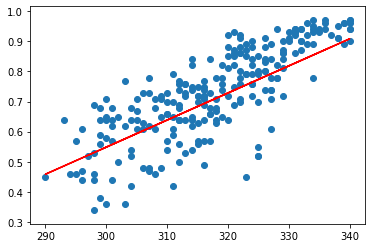

In [177]:
plt.scatter(X[:,1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

In [178]:
CV = np.vstack(
    (
        np.ones(80),
        data[240:320, 1],
    )
).T
cvy = data[240:320, 8]
dataset_CV = (CV, cvy.reshape(80,1))
(cX, cY) = dataset_CV
m, n = cX.shape

thetaCV, cost, gradient_norms = gradient_descent(
    cX,
    cY,
    theta,
    linear_cost_reg,
    linear_cost_derivate_reg,
    lambdaN = 10,
    alpha=0.00001,
    threshold=0.00001,
    max_iter=10000
)

print('THETA', thetaCV)
print(cX.shape)

THETA [[-2.8599515 ]
 [ 0.01128032]]
(80, 2)


## Cross Validation

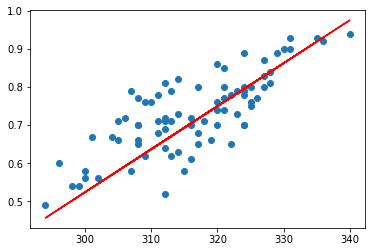

In [179]:
plt.scatter(cX[:,1], cY)
plt.plot(cX[:, 1], np.matmul(cX, thetaCV), color='red')
plt.show()

## Test

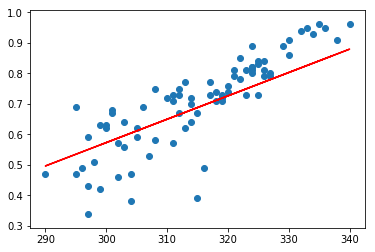

In [101]:
plt.scatter(data[321:400,1], data[321:400,8])
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

## TOEFL Score

### A continuación se encuentran histogramas de los dataset de training, cross validation y test, para asegurar que a la hora de tratar de realizar pruebas para verificar que la regresión ha acertado, no exista mucho sesgo y los datos estén relativamente normalizados.

In [161]:
TOEFL = data[0:240,2]
X = np.vstack(
    (
        np.ones(240),
        (TOEFL**2)/100,
    )
).T

dataset_1 = (X, y.reshape(240,1))

Text(0.5, 1.0, 'Training Data "TOEFL Score"')

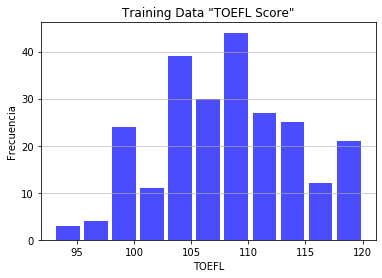

In [45]:
n, bins, patches = plt.hist(x = TOEFL, 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('TOEFL')
plt.ylabel('Frecuencia')
plt.title('Training Data "TOEFL Score"')

Text(0.5, 1.0, 'CV Data "TOEFL Score"')

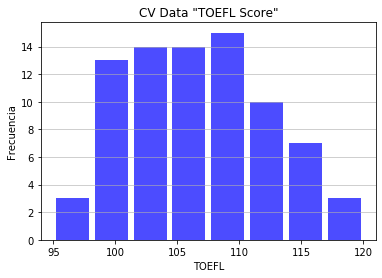

In [46]:
n, bins, patches = plt.hist(x = data[241:320,2], 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('TOEFL')
plt.ylabel('Frecuencia')
plt.title('CV Data "TOEFL Score"')

Text(0.5, 1.0, 'Test Data "TOEFL Score"')

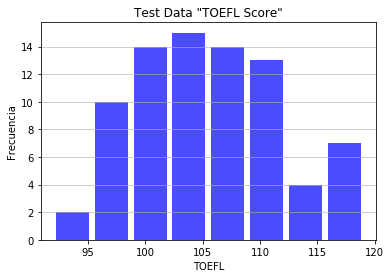

In [47]:
n, bins, patches = plt.hist(x = data[321:400,2], 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('TOEFL')
plt.ylabel('Frecuencia')
plt.title('Test Data "TOEFL Score"')

In [162]:
(X, y) = dataset_1
m, n = X.shape
theta_0 = np.random.rand(n,1)
theta, cost, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    lambdaN = 10,
    alpha=0.00001,
    threshold=0.00001,
    max_iter=10000
)

print('THETA', theta)

THETA [[-0.08031598]
 [ 0.00642059]]


## Training

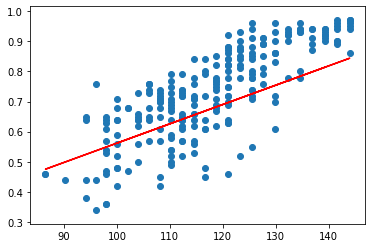

In [163]:
plt.scatter(X[:,1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

In [166]:
CV = np.vstack(
    (
        np.ones(80),
        data[240:320, 2],
    )
).T
cvy = data[240:320, 8]
dataset_CV = (CV, cvy.reshape(80,1))
(cX, cY) = dataset_CV
m, n = cX.shape

thetaCV, cost, gradient_norms = gradient_descent(
    cX,
    cY,
    theta,
    linear_cost_reg,
    linear_cost_derivate_reg,
    lambdaN = 10,
    alpha=0.00001,
    threshold=0.00001,
    max_iter=10000
)

print('THETA', thetaCV)
print(cX.shape)

THETA [[-0.74232742]
 [ 0.01322192]]
(80, 2)


## Cross Validation

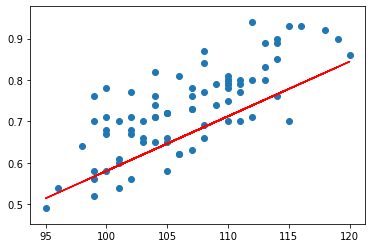

In [167]:
plt.scatter(cX[:,1], cY)
plt.plot(cX[:, 1], np.matmul(cX, thetaCV), color='red')
plt.show()

## Test

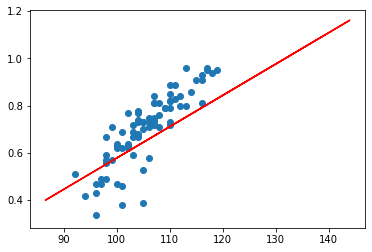

In [172]:
plt.scatter(data[321:400,2], data[321:400,8])
plt.plot(X[:, 1], np.matmul(X, thetaCV), color='red')
plt.show()

## CGPA

### A continuación se encuentran histogramas de los dataset de training, cross validation y test, para asegurar que a la hora de tratar de realizar pruebas para verificar que la regresión ha acertado, no exista mucho sesgo y los datos estén relativamente normalizados.

In [180]:
CGPA = data[0:240,6]
X = np.vstack(
    (
        np.ones(240),
        CGPA,
    )
).T

dataset_1 = (X, y.reshape(240,1))

Text(0.5,1,'Test Data "CGPA"')

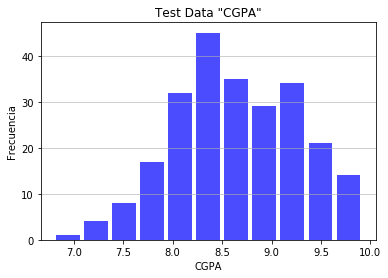

In [26]:
n, bins, patches = plt.hist(x = CGPA, 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CGPA')
plt.ylabel('Frecuencia')
plt.title('Test Data "CGPA"')

Text(0.5,1,'CV Data "CGPA"')

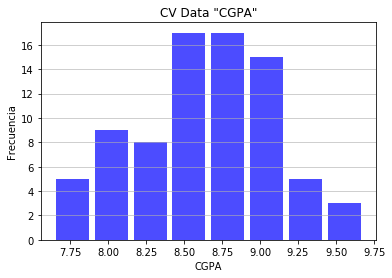

In [27]:
n, bins, patches = plt.hist(x = data[241:320,6], 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CGPA')
plt.ylabel('Frecuencia')
plt.title('CV Data "CGPA"')

Text(0.5, 1.0, 'Test Data "CGPA"')

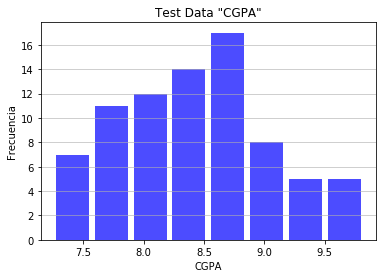

In [50]:
n, bins, patches = plt.hist(x = data[321:400,6], 
                            bins='auto', color='blue', 
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CGPA')
plt.ylabel('Frecuencia')
plt.title('Test Data "CGPA"')

In [185]:
(X, y) = dataset_1
m, n = X.shape
theta_0 = np.random.rand(n,1)
theta, cost, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_reg,
    linear_cost_derivate_reg,
    lambdaN = 0.5,
    alpha=0.00001,
    threshold=0.00001,
    max_iter=100000
)

print('THETA', theta)

THETA [[-0.32818134]
 [ 0.11772029]]


## Training

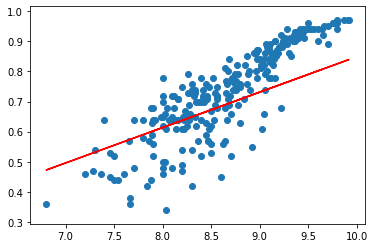

In [186]:
plt.scatter(X[:,1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

In [195]:
CV = np.vstack(
    (
        np.ones(80),
        data[240:320, 6],
    )
).T
cvy = data[240:320, 8]
dataset_CV = (CV, cvy.reshape(80,1))
(cX, cY) = dataset_CV
m, n = cX.shape

thetaCV, cost, gradient_norms = gradient_descent(
    cX,
    cY,
    theta,
    linear_cost_reg,
    linear_cost_derivate_reg,
    lambdaN = 0.2,
    alpha=0.00001,
    threshold=0.00001,
    max_iter=10000
)

print('THETA', thetaCV)
print(cX.shape)

THETA [[-0.91490921]
 [ 0.18863254]]
(80, 2)


## Cross Validation

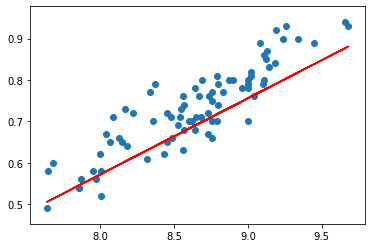

In [194]:
plt.scatter(cX[:,1], cY)
plt.plot(cX[:, 1], np.matmul(cX, thetaCV), color='red')
plt.show()

## Test

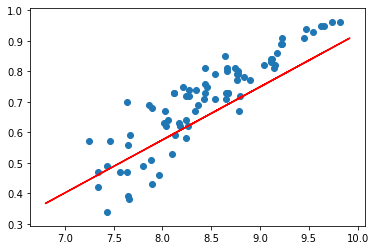

In [115]:
plt.scatter(data[321:400,6], data[321:400,8])
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()